## Investigation Overview

In this investigation, I wanted to look at the characteristics of listings and key metrics that could be used to predict their prices. 

## Dataset Overview

The data consisted of prices and attributes of approximately 50,000 Airbnb listings in NYC. The attributes included the the room types, as well as additional measurements such as number_of_reviews, minimum_nights, and calculated_host_listings_count. Eleven data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
listings = pd.read_csv('AB_NYC_2019_new.csv')

## Distribution of Neighbourhood Groups

Listings in the dataset take on a few range of values, like Manhattan, Brooklyn, Queens, etc. 

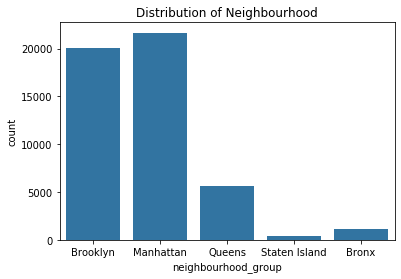

In [3]:
# plot countplot for neighbourhood group
plt.figure(figsize=(6,4))
color_base = sb.color_palette()[0]
sb.countplot(data=listings, x='neighbourhood_group',color=color_base)
plt.title('Distribution of Neighbourhood');

## Distribution of Listing Prices

Listings of the dataset takes on a wide range of values, from 10 to 10000 dollars. Plotted on a logarithmic scale, the distribution of listing prices takes on a normal distributed shape.

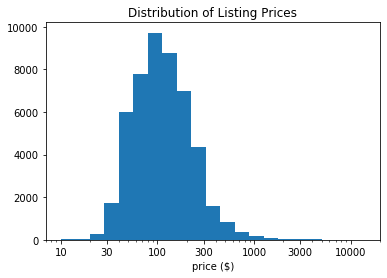

In [4]:
# plot the histograms for numeric interested variables
plt.figure(figsize = (6,4))
sb.reset_defaults()
bins = 10**np.arange(1, np.log10(listings['price'].max())+0.15,0.15)
plt.hist(data=listings, x='price',bins=bins)
plt.xscale('log')
tick_locs = [10,30,100,300,1000,3000,10000]
plt.xticks(tick_locs,tick_locs)
plt.xlabel('price ($)',fontsize=10)
plt.title('Distribution of Listing Prices');

## Price vs. Number of Reviews, Minimum Nights, Calculated Host Listings

There is an interaction effect between price, number of reviews, minimum nights and calculated host listings. This is the most evident for number of reviews. The scatterplot shows the higher the number of reviews, the lower the price. Cheaper choices are always more attractive and result in higher amount of reviews. There appears to be a negative relationship between minimum nights and prices, because if a listing requires more minimum nights, it tends to price lower.

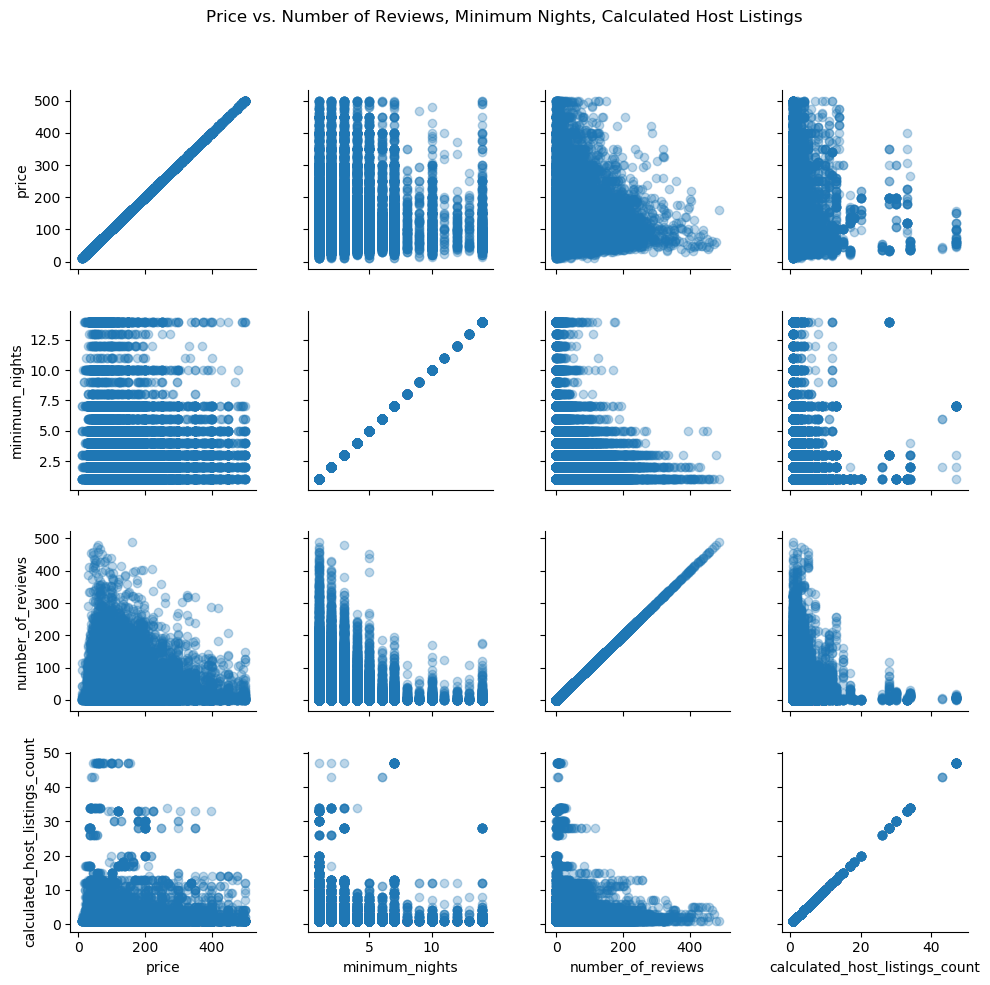

In [5]:
# Plot a scatter matrix among different numeric variables, focus only on most common values
listings_matrix = listings[(listings['price'] < 500) & (listings['minimum_nights'] < 15) & (listings['number_of_reviews'] < 500)
                          & (listings['calculated_host_listings_count'] < 80)]
numeric_vars = ['price','minimum_nights','number_of_reviews','calculated_host_listings_count']
g = sb.PairGrid(data=listings_matrix, vars=numeric_vars)
g.map(plt.scatter,alpha=0.3)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price vs. Number of Reviews, Minimum Nights, Calculated Host Listings');

## Price vs. Room Type and Neighbourhood Group

We can see the effect of room types and neighbourhood groups on prices. Entire home/apt has the highest range of prices compared to private room and shared room. The mid 50% of Entire home ranges from 120-250 dollars. For neighbourhood, Manhattan takes on the highest range due to the common sense that it's expensive to live in this area. 

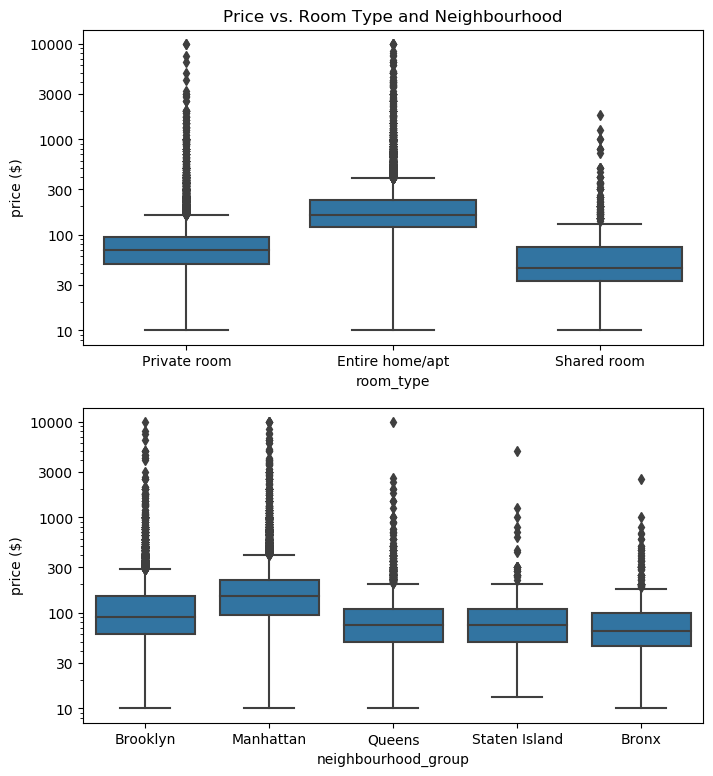

In [6]:
# plot price by room type and neighbourhood_group
room_neighbour = ['room_type','neighbourhood_group']
fig, ax = plt.subplots(nrows=2, figsize=(8,9))

for i in range(2):
    sb.boxplot(data=listings, x=room_neighbour[i],y='price',color=color_base, ax=ax[i])
    ax[i].set_yscale('log')
    tick_locs = [10,30,100,300,1000,3000,10000]
    ax[i].set_yticks(tick_locs)
    ax[i].set_yticklabels(tick_locs)
    ax[i].set_ylabel('price ($)');
    
ax[0].set_title('Price vs. Room Type and Neighbourhood');

## Price by longtitude and latitude

With longtitude and latitude data for each listing at hand, we'd like to explore the prices by geo information. Now we can see the most expensive areas to live on NYC map to get an idea about how the prices vary by geo.

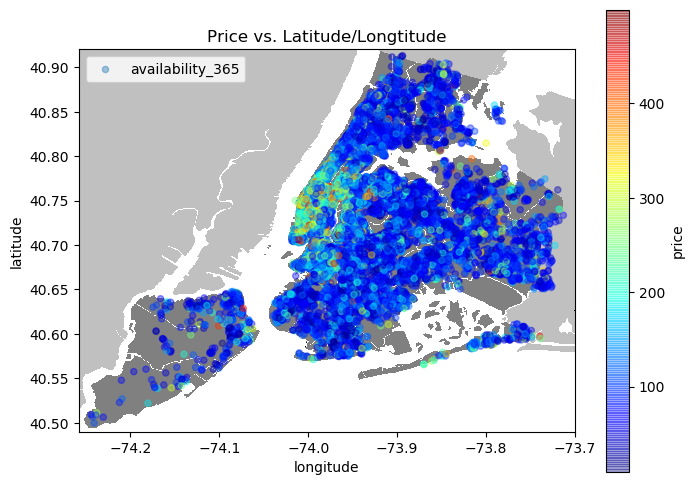

In [7]:
import urllib

listings_less500 = listings[listings.price < 500]

#initializing the figure size
plt.figure(figsize=(8,6))

#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

#using scatterplot again
listings_less500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.title('Price vs. Latitude/Longtitude');